# THE SPARKS FOUNDATION 

# TASK DONE BY :- PAWAN KUAMR 

### PROBLEM STATEMENT 

### creat the decision tree classifier and visualize it graphically

In [1]:
# All library import 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
                                              

In [2]:
# data import

Iris = pd.read_csv('Iris.csv')
Iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
45,46,4.8,3.0,1.4,0.3,Iris-setosa
121,122,5.6,2.8,4.9,2.0,Iris-virginica
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
48,49,5.3,3.7,1.5,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


In [3]:
# shape check
Iris.shape

(150, 6)

In [4]:
# check data info
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# unique value check
Iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# encoding
Iris['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [7]:
Iris['Species'].unique()

array([0, 1, 2], dtype=int64)

In [8]:
# check data info
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [9]:
# check null value
Iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# delete colume in data set
Iris.drop('Id',axis=1,inplace=True)

In [11]:
# check describe
Iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# value count
Iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [13]:
# corrrelation
corr=Iris.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

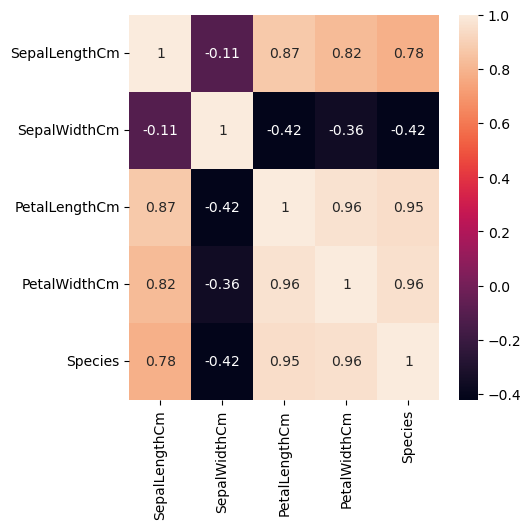

In [14]:
# corr graph
plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True)

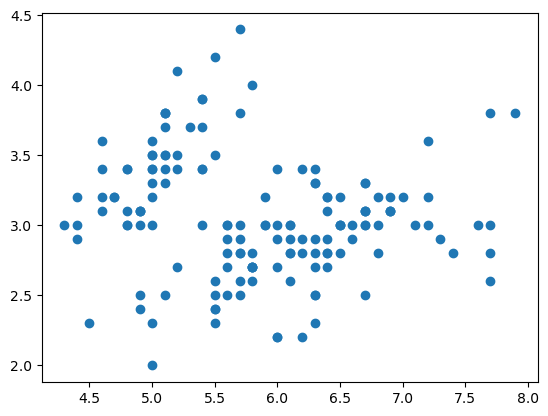

In [15]:
plt.scatter(Iris['SepalLengthCm'],Iris['SepalWidthCm'])

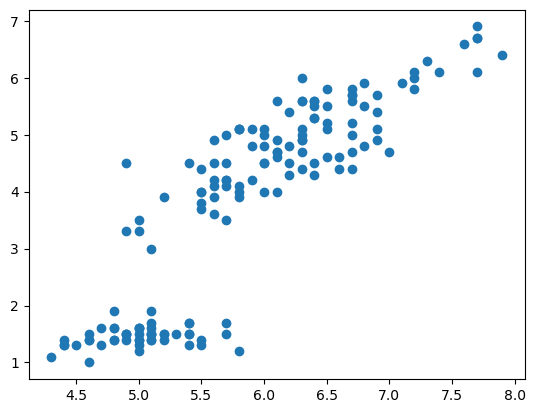

In [16]:
plt.scatter(Iris['SepalLengthCm'],Iris['PetalLengthCm'])

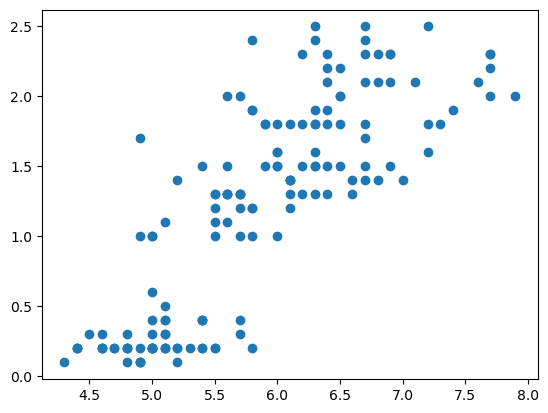

In [17]:
plt.scatter(Iris['SepalLengthCm'],Iris['PetalWidthCm'])

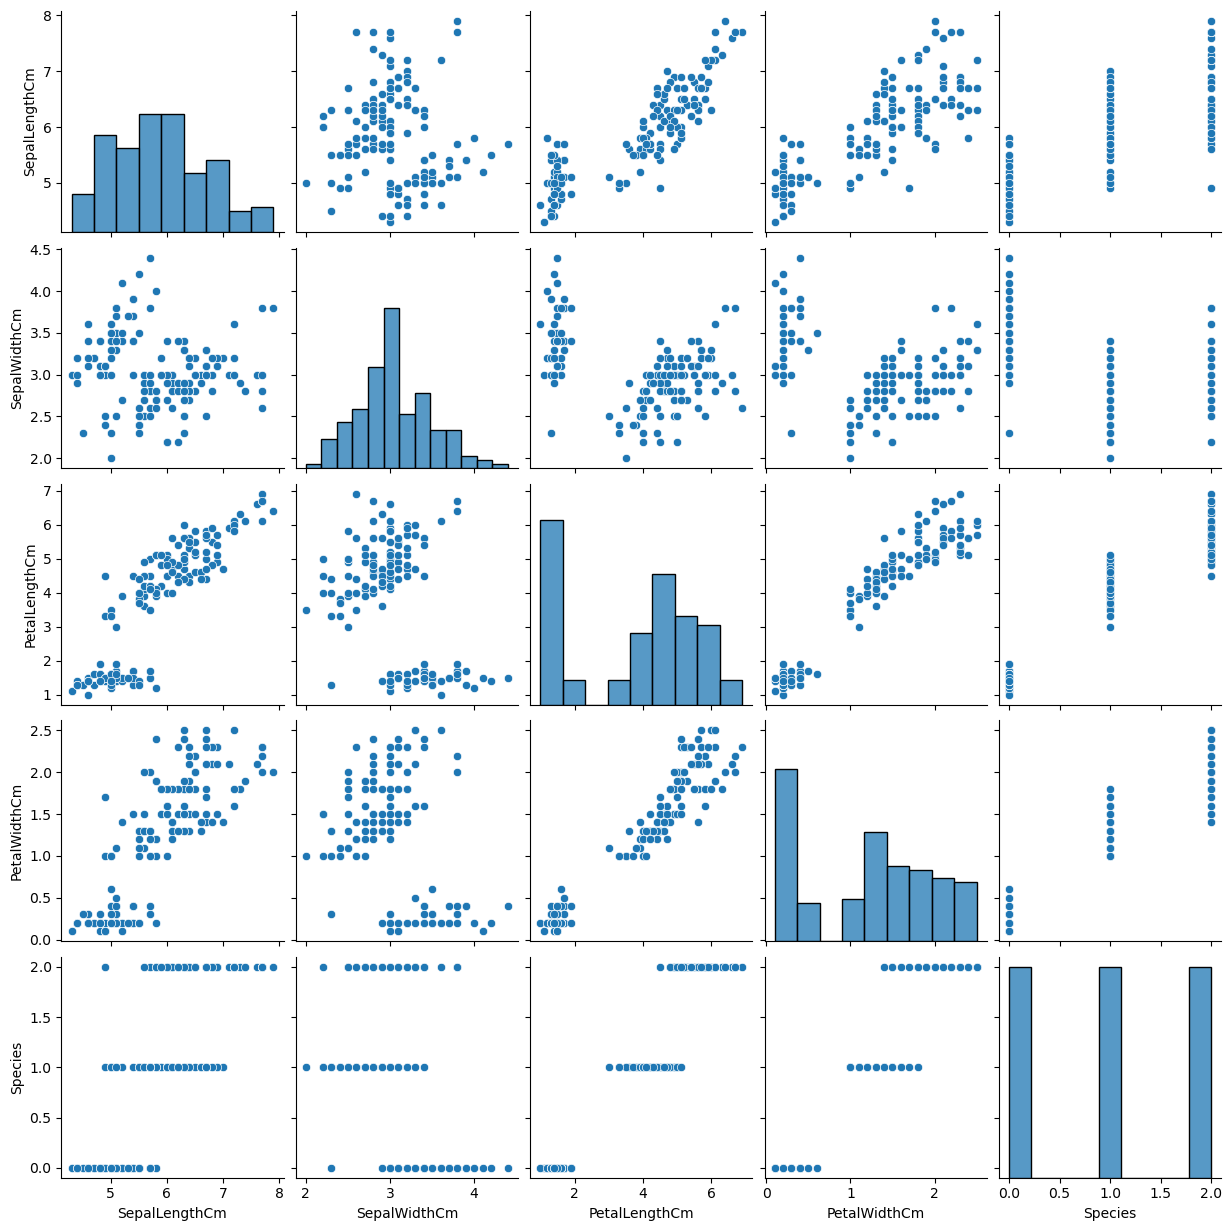

In [18]:
sns.pairplot(Iris)

## model traning 

In [19]:
x=Iris.drop('Species',axis=1)
y=Iris['Species']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=18)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [22]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)  

DecisionTreeClassifier(random_state=0)

In [23]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2,
       2, 1, 2, 0, 0, 0, 2, 2], dtype=int64)

In [24]:
print('confusion matrix--')
print(confusion_matrix(y_test,y_pred))

confusion matrix--
[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


In [25]:
print(f'accuracy score',accuracy_score(y_test,y_pred))
print(f'precision score',precision_score(y_test,y_pred,average='macro'))
print(f'recall score',recall_score(y_test,y_pred,average='macro'))

accuracy score 0.9666666666666667
precision score 0.9629629629629629
recall score 0.9666666666666667


In [26]:
# classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [27]:
# export_text given a text representation of the Descision tree
feature_names=['SepalLengthCm','SepalWidthCm','SepalWidthCm','PetalWidthCm']
class_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
tree_representation=tree.export_text(model,feature_names=feature_names)
print(tree_representation)

|--- PetalWidthCm <= 0.80
|   |--- class: 0
|--- PetalWidthCm >  0.80
|   |--- PetalWidthCm <= 1.75
|   |   |--- SepalWidthCm <= 4.95
|   |   |   |--- PetalWidthCm <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- PetalWidthCm >  1.65
|   |   |   |   |--- class: 2
|   |   |--- SepalWidthCm >  4.95
|   |   |   |--- PetalWidthCm <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- PetalWidthCm >  1.55
|   |   |   |   |--- class: 1
|   |--- PetalWidthCm >  1.75
|   |   |--- SepalWidthCm <= 4.85
|   |   |   |--- SepalLengthCm <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- SepalLengthCm >  5.95
|   |   |   |   |--- class: 2
|   |   |--- SepalWidthCm >  4.85
|   |   |   |--- class: 2



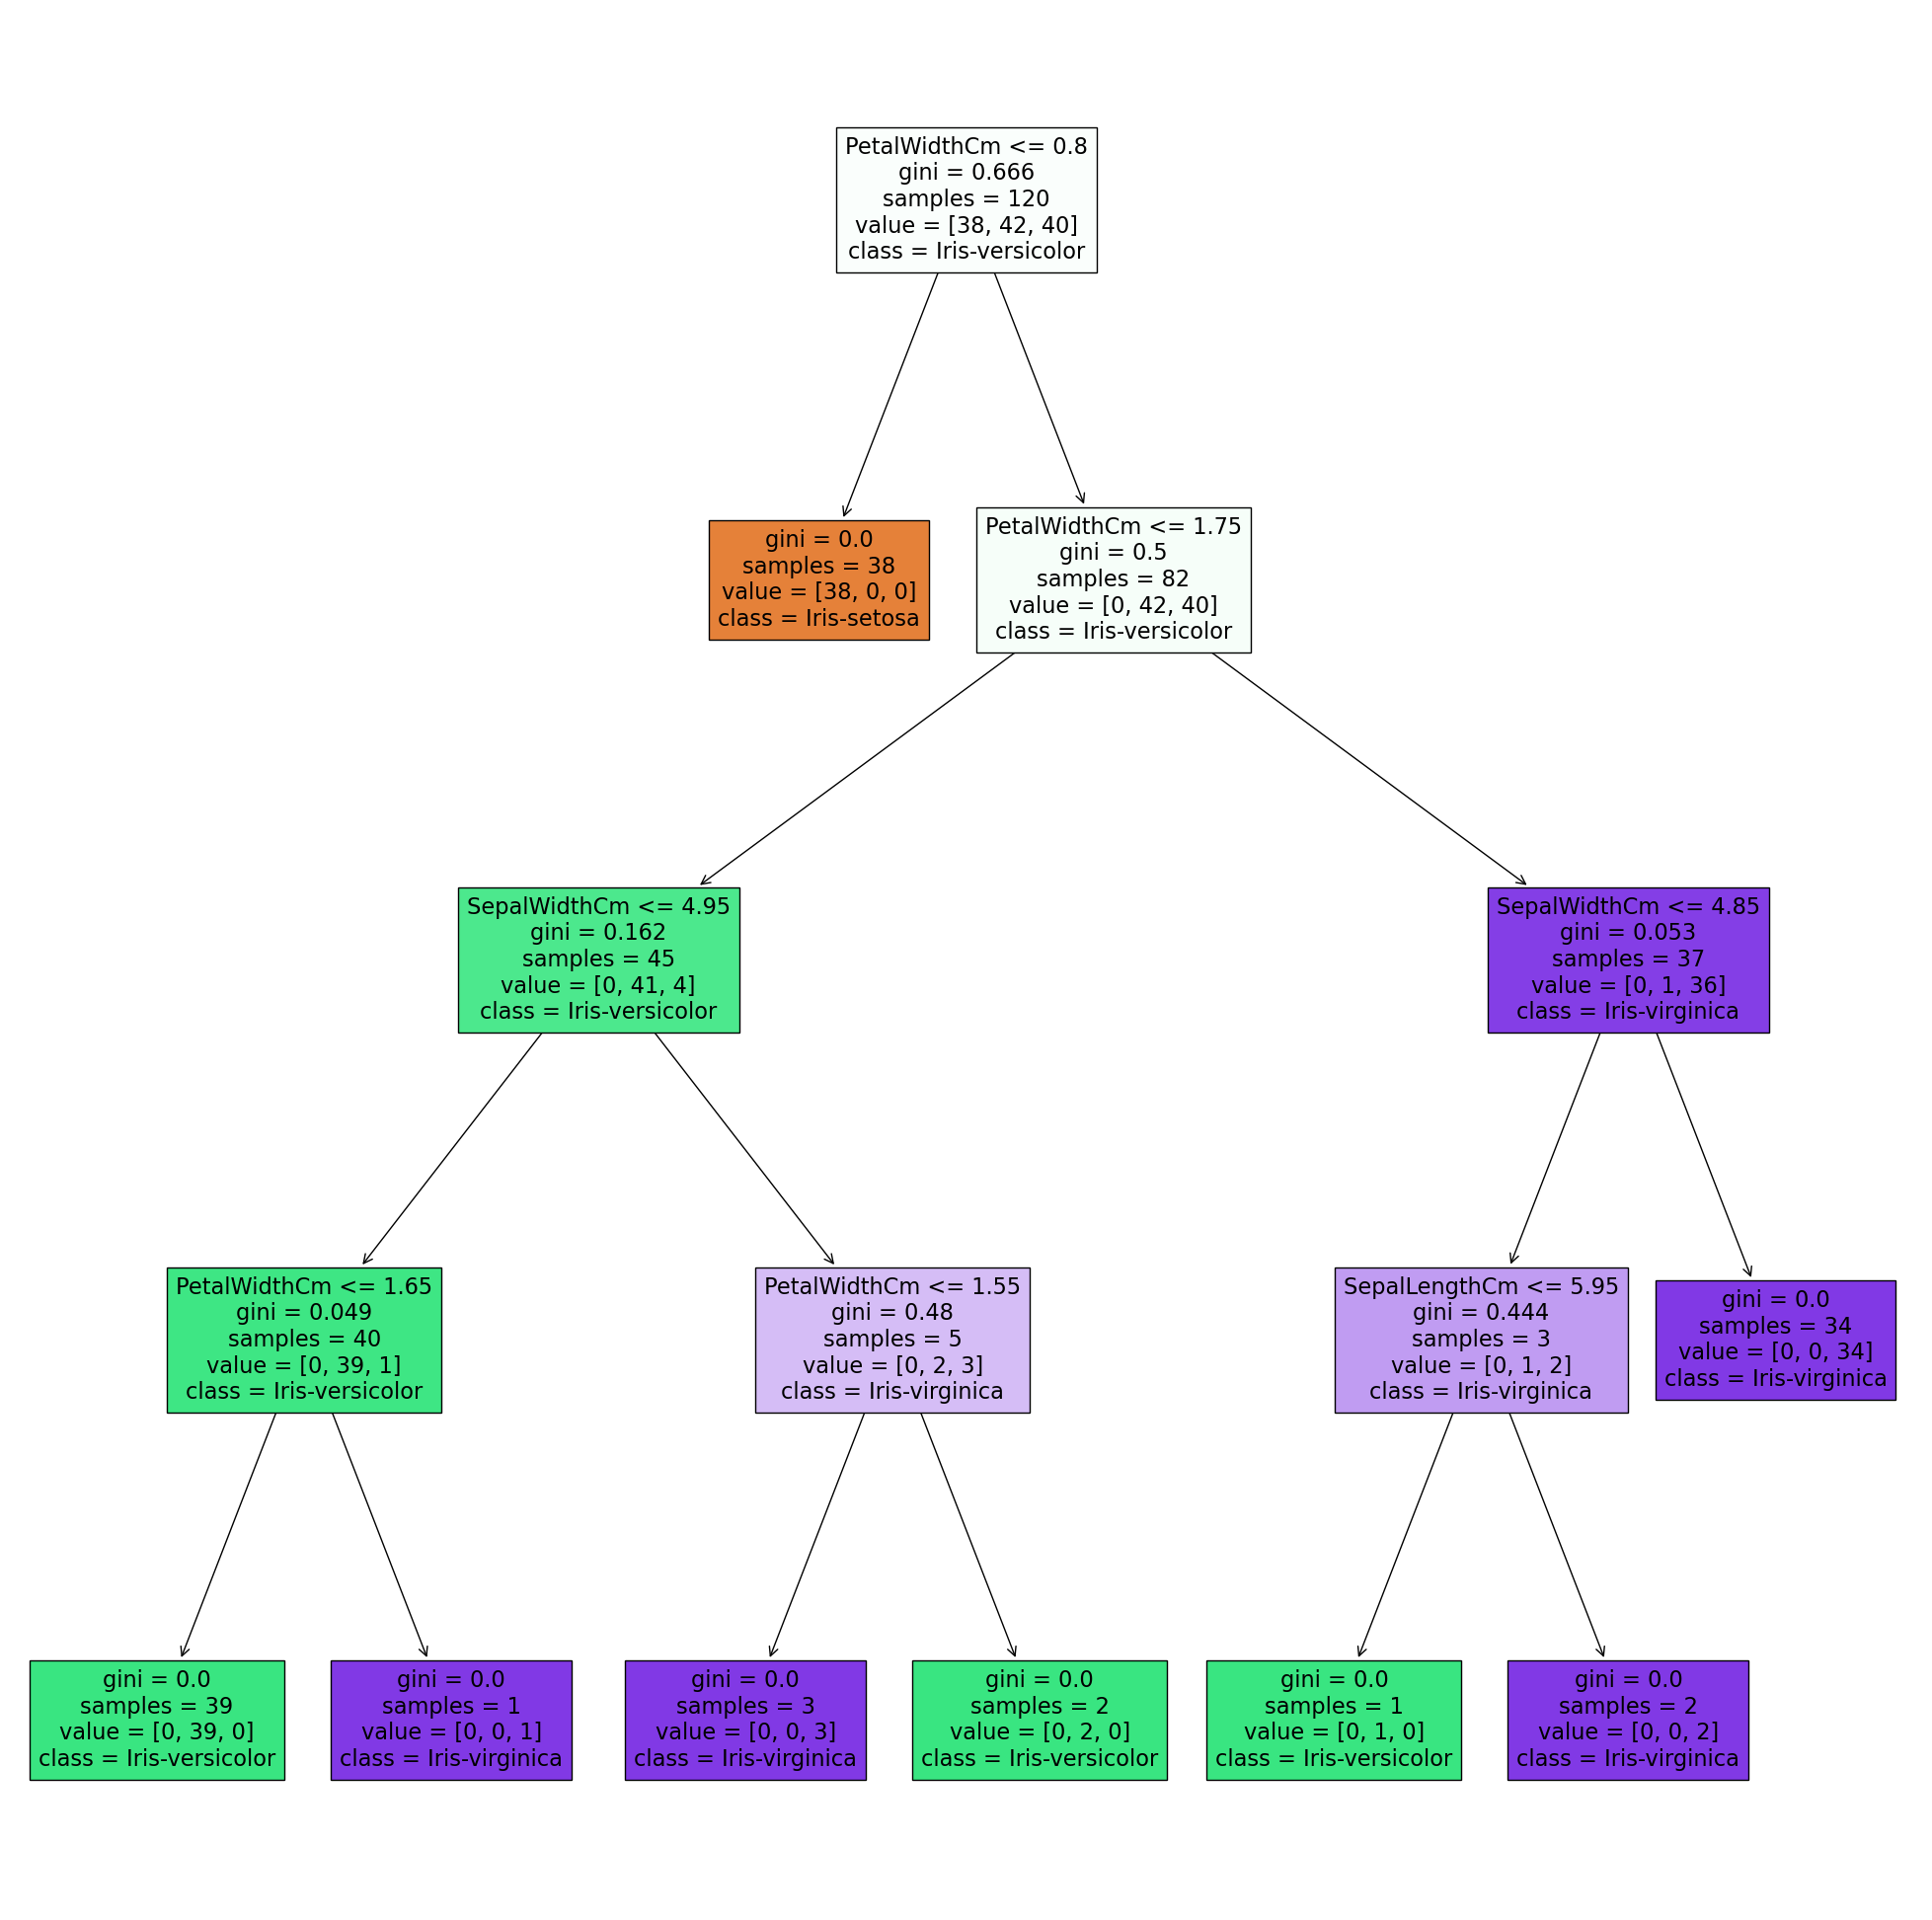

In [28]:
fig=plt.figure(figsize=(25,25))
a=tree.plot_tree(model,feature_names=feature_names,class_names=class_names,filled=True)